# PANDAS - TIMESERIES ET BITCOIN

In [2]:
# chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# chargement du dataset
bitcoin = pd.read_csv('BTC-EUR.csv')

In [4]:
# les données
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
1,2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2,2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
3,2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
4,2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


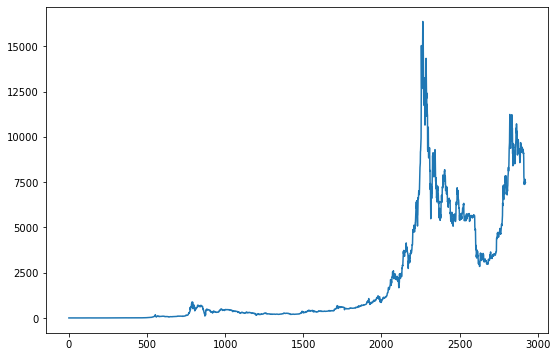

In [6]:
#  voir l'évolution d'une des valeurs : plot
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [7]:
# pas de dates en abscisse car pandas ne sait pas qu'on veut travailler sur
# une base dataframe temporelle

# index par défaut :
bitcoin.index

RangeIndex(start=0, stop=2923, step=1)

In [8]:
# pour changer l'index en index temporelle et débloquer les timeseries
# on utilise les datatimeindex
# on indique la colonne d'index est celle correspondant à la colonne
# de date au chargement
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date')

In [9]:
bitcoin.head() # index = date

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


C:\Users\Outils\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


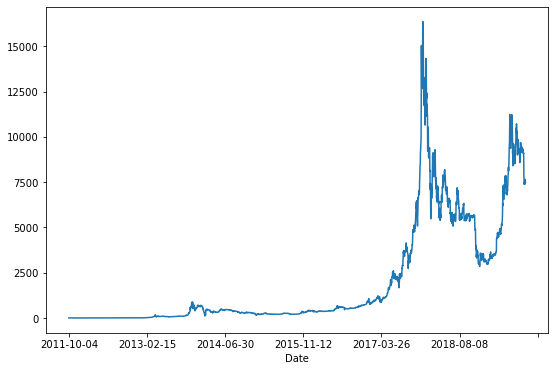

In [10]:
# constation sur le graphique
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [11]:
# MAIS il faut indiquer à pandas que cette colonne index ajoutée
# doit être interprétée comme une date : parse_dates=True
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [12]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


In [13]:
bitcoin.index # ==> Datetimeindex

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

In [14]:
# grâce à ce nouvel index on peut travailler sur les dates et temps
# de l'indexing, du slicing

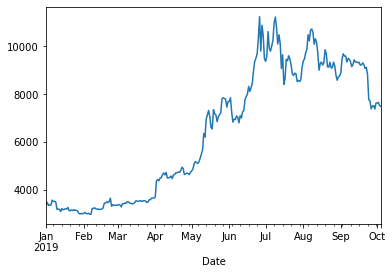

In [16]:
# on veut l'évolution du bitcoin seulement sur 2019 
bitcoin['2019']['Close'].plot()
plt.show()

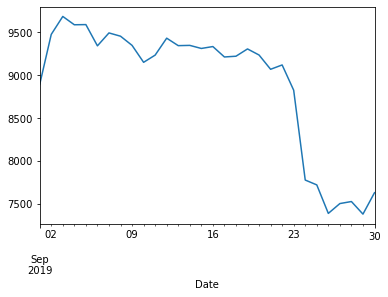

In [17]:
# on veut l'évolution du bitcoin seulement sur SEPTEMBRE 2019 
bitcoin['2019-09']['Close'].plot()
plt.show()

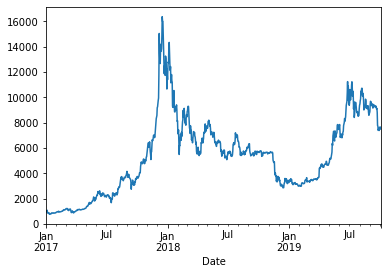

In [19]:
# slicing : évolution entre 2017 et 2019
bitcoin['2017':'2019']['Close'].plot()
plt.show()

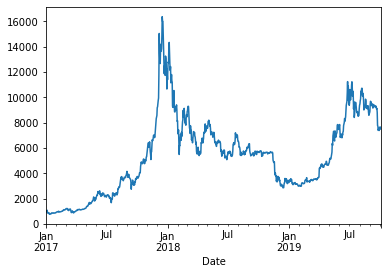

In [20]:
# idem avec loc
bitcoin.loc['2017':'2019','Close'].plot()
plt.show()

## Fonction : resample() 

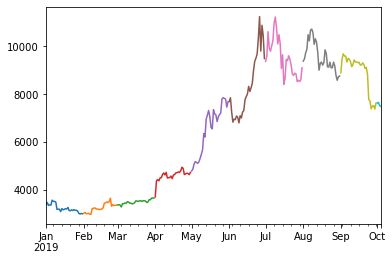

In [23]:
# permet de regrouper les données selon une fréquence temporelle

# regroupement des données de 2019 par mois
bitcoin.loc['2019', 'Close'].resample('M').plot()
plt.show()

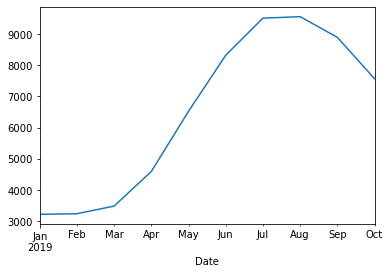

In [24]:
# donc on peut faire des statistiques : moyenne sur chaque mois
bitcoin.loc['2019', 'Close'].resample('M').mean().plot()
plt.show()

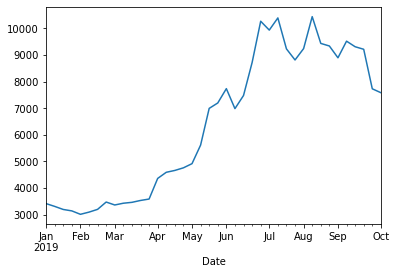

In [25]:
# on peut faire les stats sur semaine 'W'
bitcoin.loc['2019', 'Close'].resample('W').mean().plot()
plt.show()

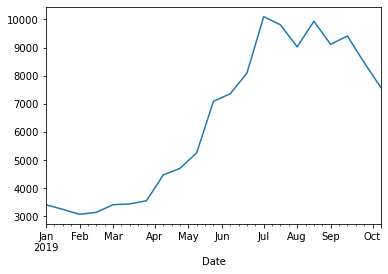

In [26]:
# on peut faire les stats  toutes les 2 semaines '2W'
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

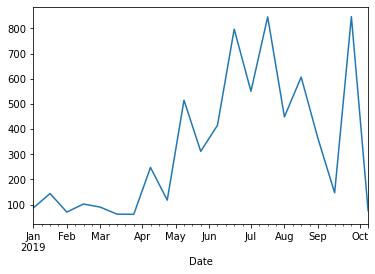

In [27]:
#  on peut voir l'écart type
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show() # stable au début

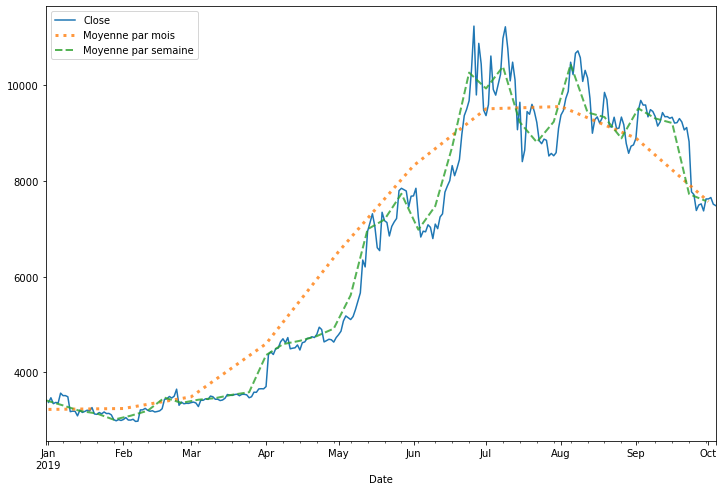

In [29]:
# pour afficher toutes les courbes sur un seul graphique
plt.figure(figsize=(12,8))
bitcoin['2019']['Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

## Fonction : agregate()

In [30]:
# agregate() permet de rassembler dans un seul tableau plusieurs stats
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean','std','min','max'])

,mean,std,min,max
Date,,,,
2019-01-06,3413.619995,86.412199,3345.330078,3565.800049
2019-01-13,3308.722830,187.370818,3090.370117,3513.979980
2019-01-20,3193.085728,42.170285,3129.989990,3263.669922
2019-01-27,3139.568534,20.884335,3110.709961,3171.270020
2019-02-03,3010.647182,21.591732,2986.850098,3054.060059
2019-02-10,3093.135742,125.474356,2973.739990,3247.080078
2019-02-17,3196.895717,21.848029,3171.590088,3238.939941
2019-02-24,3472.014334,100.274323,3311.520020,3648.610107
2019-03-03,3361.397147,13.607572,3343.159912,3378.629883


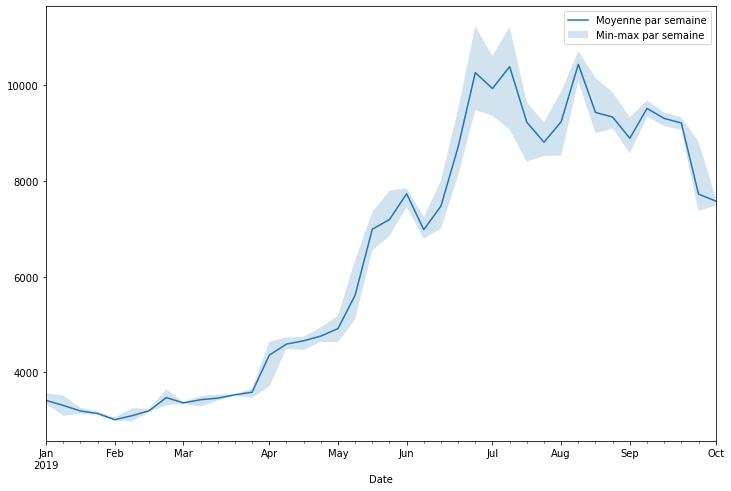

In [31]:
#  avec matplotlib pour afficher sur un diagramme
m = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='Moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='Min-max par semaine')
plt.legend()
plt.show()


## MOVING AVERAGE

In [32]:
# technique qui permet de calculer une moyenne mais plutôt que moyenne
# de toutes les valeurs, on fait une fenêtre de x jours...
bitcoin.loc['2019', 'Close'].rolling(window=7) # une rolling focntion

Rolling [window=7,center=False,axis=0]

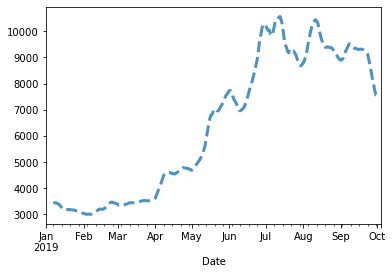

In [35]:
# on veut faire des stats
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()
plt.show()

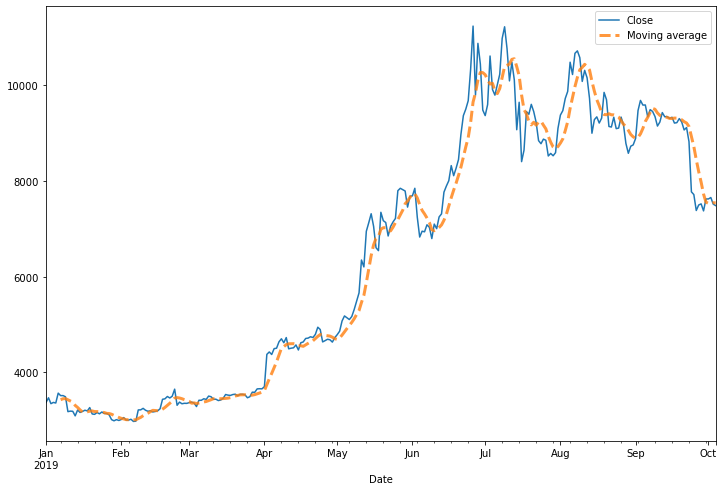

In [38]:
# on combinant sur la figure originelle
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
plt.legend()
plt.show()

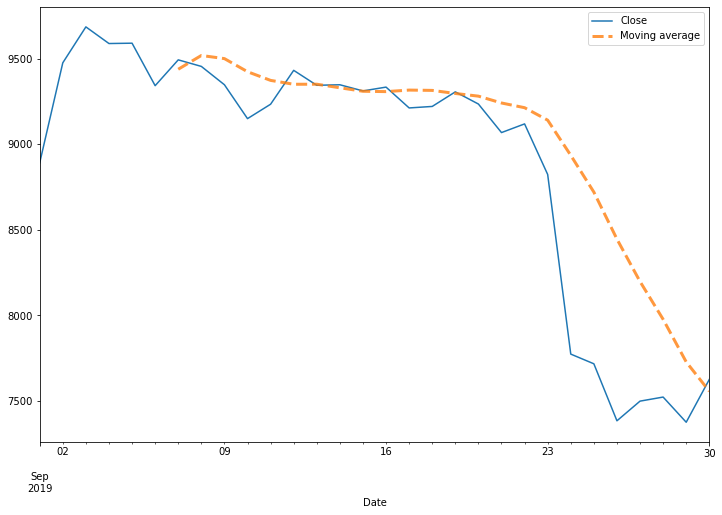

In [39]:
# pour le mois de septembre
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
plt.legend()
plt.show()
# notre moving average ne commence pas au début du signal
# placer la moyenne au milieu de la fenêtre

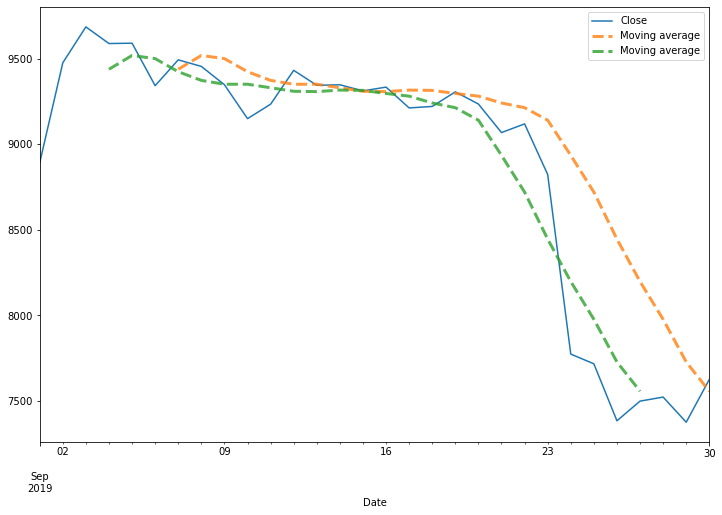

In [41]:
# placer la moyenne au milieu de la fenêtre
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
plt.legend()
plt.show()
# un peu mieux mais toujours décalé ==> pas la meilleure technique pour
# faire cette action ==> EXPONENTIEL WEIGHTED FUNCTION

## EXPONENTIEL WEIGHTED FUNCTION - MOYENNE MOBILE EXPONENTIELLE

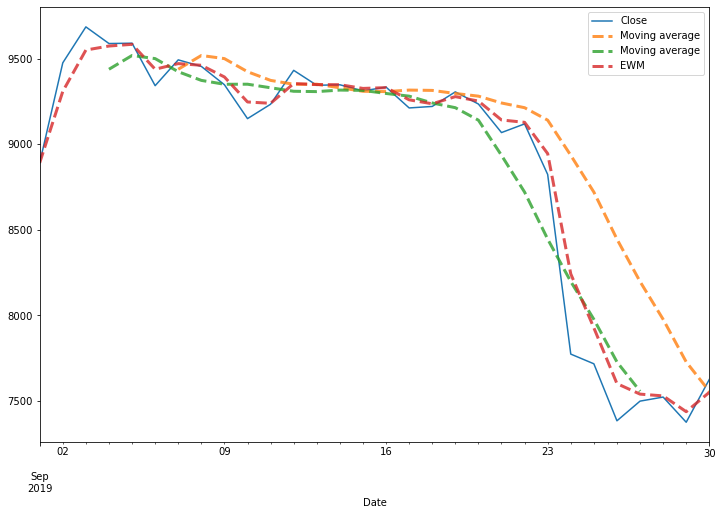

In [44]:
# avec EXP WEIGHT FUNCTION
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='EWM', lw=3, ls='--', alpha=0.8)
plt.legend()
plt.show() # la courbe est beaucoup mieux disposée et suit mieux la tendance

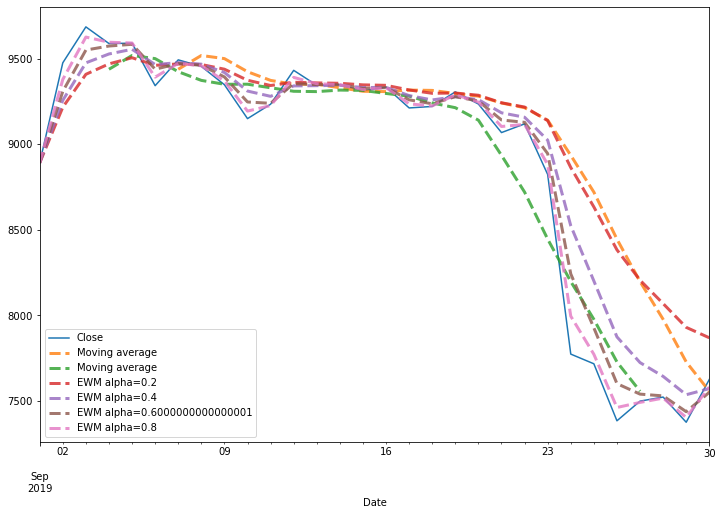

In [48]:
# avec EXP WEIGHT FUNCTION
# avec boucle for pour comparer le lissage du paramètre alpha
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average', lw=3, ls='--', alpha=0.8)
# de 0.2 à 1 avec pas de 0.2
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'EWM alpha={i}', lw=3, ls='--', alpha=0.8)
plt.legend()
plt.show() # la courbe est beaucoup mieux disposée et suit mieux la tendance

## ASSEMBLER 2 DATASETS

### fonction : merge()

In [49]:
# comparer bitcoin et ethereum (autre monnaie)
# mais ethereum ne commence qu'en 2015

In [50]:
# importer les données
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [51]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,0.593,20.000,0.5930,2.56,2.56,15200
2015-08-08,2.560,2.598,0.5616,0.65,0.65,32816
2015-08-09,0.650,0.800,0.5235,0.70,0.70,4041
2015-08-10,0.700,0.750,0.5850,0.68,0.68,5645
2015-08-11,0.680,1.008,0.5915,0.95,0.95,21607


In [52]:
ethereum.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

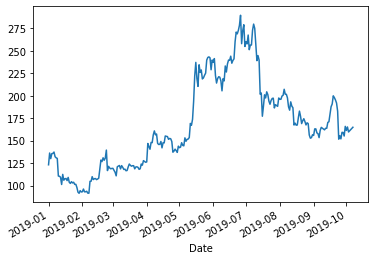

In [55]:
ethereum['2019']['Close']. plot()
plt.show() # même tendance que le bitcoin

In [56]:
# pour voir si même tendance que le bitcoin, on assemble les 2 dataframes
#  on définit une colonne sur laquelle l'assemblage doit s'effectuer
#  ==> Date puisque colonne en commun et ont les mêmes valeurs
# choisir une façon d'assemblage, différentes sortes :outer, keft, right
# inner...
pd.merge(bitcoin, ethereum, on='Date', how='inner')

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593000,20.000000,0.593000,2.560000,2.560000,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560000,2.598000,0.561600,0.650000,0.650000,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650000,0.800000,0.523500,0.700000,0.700000,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700000,0.750000,0.585000,0.680000,0.680000,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680000,1.008000,0.591500,0.950000,0.950000,21607
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-29,7523.009766,7541.020020,7247.169922,7375.950195,7375.950195,39755968,159.130005,159.779999,150.610001,155.160004,155.160004,7857348
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908,155.160004,166.649994,151.229996,165.910004,165.910004,15659055
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316,165.910004,170.710007,159.330002,161.410004,161.410004,11427525


In [57]:
# x = bitcoin
# y = ethereum
#  pour remplacer utiliser suffixe:
pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593000,20.000000,0.593000,2.560000,2.560000,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560000,2.598000,0.561600,0.650000,0.650000,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650000,0.800000,0.523500,0.700000,0.700000,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700000,0.750000,0.585000,0.680000,0.680000,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680000,1.008000,0.591500,0.950000,0.950000,21607
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-29,7523.009766,7541.020020,7247.169922,7375.950195,7375.950195,39755968,159.130005,159.779999,150.610001,155.160004,155.160004,7857348
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908,155.160004,166.649994,151.229996,165.910004,165.910004,15659055
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316,165.910004,170.710007,159.330002,161.410004,161.410004,11427525


In [58]:
#  les données commencent en 2015 car ethereum pas de données avant
# toutes les données de bitcoin avant 2015 sont poubellisées
#  inner = assemble les dataframe sur les index en commun

In [59]:
# how=outer : assemble les df sur toute l'étendue des 2 dataframes
pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2011-10-04,3.700000,3.821000,3.746000,3.750000,3.750000,1.357000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-05,3.750000,3.820000,3.650000,3.676000,3.676000,3.349000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-06,3.676000,3.743000,3.450000,3.550000,3.550000,6.642000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-07,3.550000,3.590000,2.900000,3.293000,3.293000,7.135000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-08,3.293000,3.283000,2.872000,2.890000,2.890000,2.007000e+03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,7.564432e+07,165.910004,170.710007,159.330002,161.410004,161.410004,11427525.0
2019-10-02,7625.560059,7663.270020,7489.770020,7655.250000,7655.250000,5.187133e+07,161.410004,165.740005,159.699997,165.240005,165.240005,5760811.0
2019-10-03,7655.250000,7685.930176,7379.220215,7516.790039,7516.790039,4.943731e+07,165.240005,165.520004,154.960007,159.690002,159.690002,7711746.0


In [60]:
#  on a les données de bitcoin et Nan pour ethereum

In [62]:
#  on choisit inner et le dataframe est nommé btc_eth
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

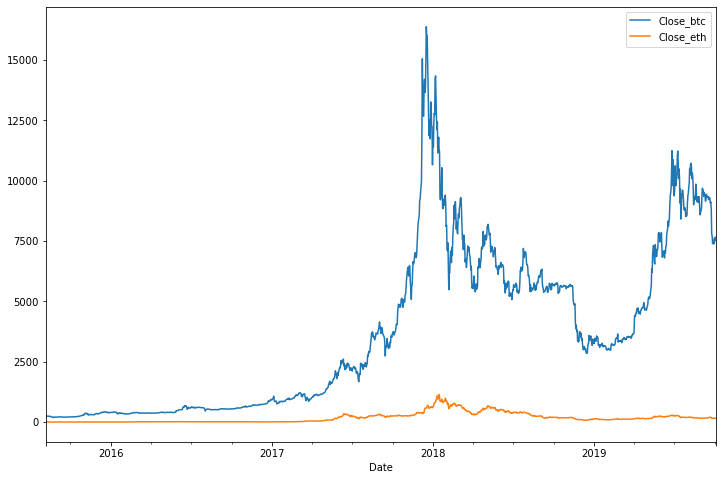

In [67]:
#  on affiche les colonnes Close_btc et cClose_eth et dessine plot
btc_eth[['Close_btc','Close_eth']].plot(figsize=(12,8))
plt.show()

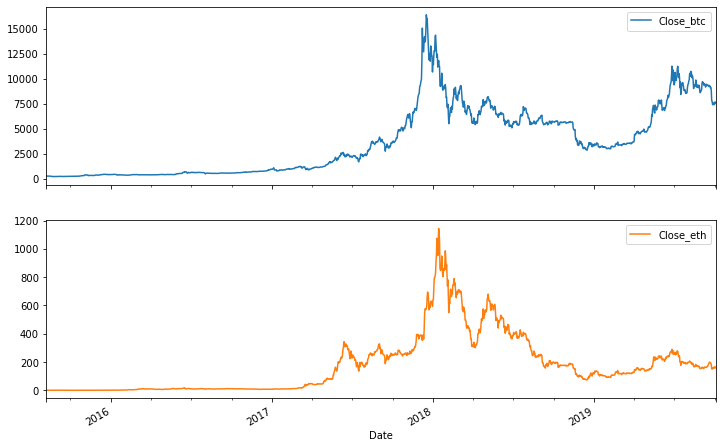

In [68]:
#  mais nos 2 crypto monnaies n'ont pas la même échelle
#  donc compliqué de lire les infos de ethereum
# ASTUCE : créer des subplot à l'intérieur de plor()
btc_eth[['Close_btc','Close_eth']].plot(subplots=True, figsize=(12,8))
plt.show()

In [69]:
# 2 crypto-monnaies semblent très corrélées ==> voir la corrélation
btc_eth[['Close_btc','Close_eth']].corr()
#  corrélation de 79% ==< très élevés

,Close_btc,Close_eth
Close_btc,1.000000,0.791416
Close_eth,0.791416,1.000000


<AxesSubplot:>

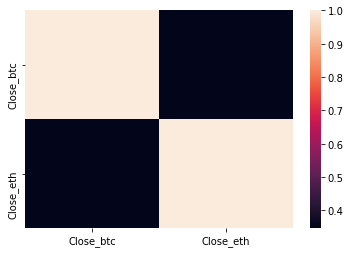

In [71]:
# pour voir les corrélations avec seaborn ==> voir formation seaborn
#  sur septembre 2019
import seaborn as sns
correlations = btc_eth[['Close_btc','Close_eth']]['2019-09'].corr()
sns.heatmap(correlations)

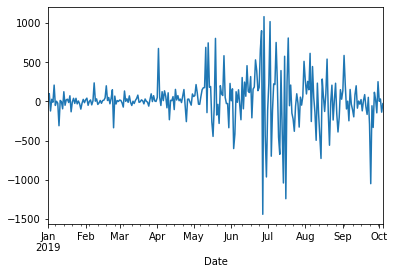

In [72]:
# variation du bitcoin jour après jour : diff()
bitcoin['Close']['2019'].diff().plot()
plt.show()
#  ne pas investir dans le bitcoin car très volatile

## EXERCICE VIDEO 17

In [73]:
#  SOLUTION SIMPLE :
data_3 = pd.read_excel('titanic.xls')
# modifier la colonne age pour créer 4 catégorie 0-20, 20-30, 30-40, >40
# technique de feature engineering :  faire des analyses avec plus de sens
# transforme la colonne age en mettant 0 si 0-20, 1 si 20-30, 2 si 30-40
# 4 si >40  via masque sur colonne agepuis on compte le nombre 
data_3.loc[data_3['age']<=20, 'age'] = 0
data_3.loc[ (data_3['age']>20) & (data_3['age']<=30), 'age' ] = 1
data_3.loc[(data_3['age']>30) & (data_3['age']<=40), 'age'] = 2
data_3.loc[data_3['age']>40, 'age'] = 3
data_3['age']   

0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1304    0.0
1305    NaN
1306    1.0
1307    1.0
1308    1.0
Name: age, Length: 1309, dtype: float64

In [75]:
data_3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,1.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,0.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [78]:
data_3['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [79]:
data_3.groupby(['age']).mean()

,pclass,survived,sibsp,parch,fare,body
age,,,,,,
0.0,2.568548,0.459677,0.991935,0.745968,29.025169,148.214286
1.0,2.371191,0.371191,0.326870,0.218837,28.159013,170.393939
2.0,2.109524,0.423810,0.361905,0.414286,42.701507,155.343750
3.0,1.643172,0.396476,0.378855,0.392070,53.123858,161.853659


In [82]:
# SOLUTION 2 : avec des map
# exemple faire age + 1 sur la nouvelle colonne age
#  donc créer une fonction x=x+1 à l'intérieur de map
data_3['age'].map(lambda x:x+1)

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
1304    1.0
1305    NaN
1306    2.0
1307    2.0
1308    2.0
Name: age, Length: 1309, dtype: float64

In [86]:
#  création d'une fonction catégorie age
def categorie_ages(age):
    if age<=20:
        return '<=20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '>40 ans'

In [87]:
#  on fait passer cette fonction dans map
data_3['age'].map(categorie_ages)
# résultat ligne par ligne de la colonne age

0       <=20 ans
1       <=20 ans
2       <=20 ans
3       <=20 ans
4       <=20 ans
          ...   
1304    <=20 ans
1305     >40 ans
1306    <=20 ans
1307    <=20 ans
1308    <=20 ans
Name: age, Length: 1309, dtype: object

In [ ]:
#  transformer des données du dataframe str en int : ex 'sex'
# 3 possibilités

In [89]:
#  1. avec map() :
data_3['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

In [90]:
#  2. avec replace() : remplace éléments de la 1ère liste par ceux de la 2ième
data_3['sex'].replace(['male','female'],[0, 1])

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

In [91]:
#  3. avec astype() : en utilisant les codes de catégorie
data_3['sex'].astype('category')

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: category
Categories (2, object): ['female', 'male']

In [93]:
data_3['sex'].astype('category').cat.codes # transforme les types en code
# automatiquement très utile lorsqu'il y a beaucoup de catégorie

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

## EXERVICE VIDEO 18

In [95]:
# mettre en place la stratégie de la torture en trading
# afin de décider quand acheter du bitcoin sur les 28 derniers
# jours en fonction de 'Close' par rapport au 28 derniers jours

In [97]:
# chargement du dataset
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

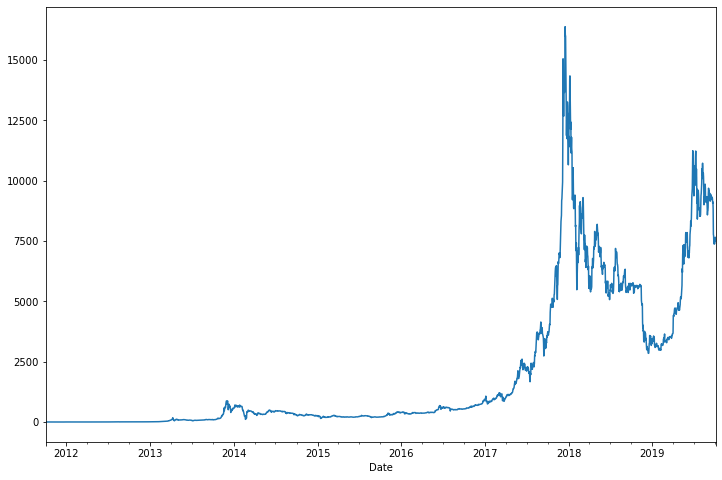

In [98]:
# figure de base
bitcoin['Close'].plot(figsize=(12,8))
plt.show()

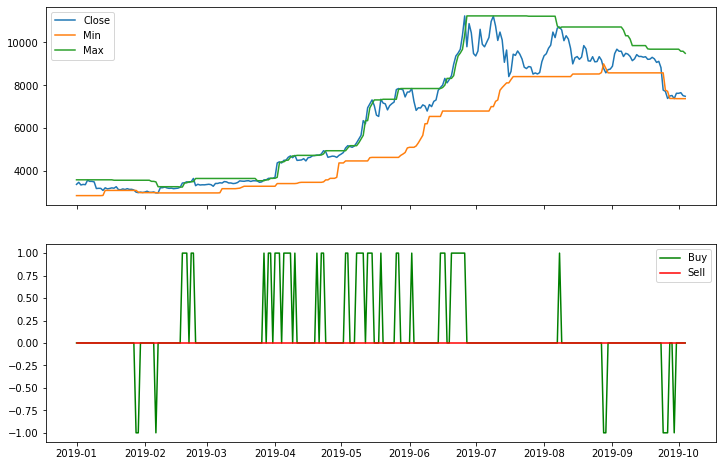

In [107]:
# créer une copie du dataframe bitcoin
data=bitcoin.copy()

# ajout d'une colonne 'Buy' remplie de zéros
data['Buy'] = np.zeros(len(data))
# ajout d'une colonne 'Sell' remplie de zéros
data['Sell'] = np.zeros(len(data))

# ajout d'une colonne 'RollingMin' en décalant le signal de 1 jour
#  car sinon bitcoin toujours entre son min et max
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
# ajout d'une colonne 'RollingMax'
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()

# indexing pour écrire 1 si maximum < signal 'Close et -1 sinon
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Buy'] = -1

# tracer sur une figure
start = '2019'
end ='2019'
# Méthode orientée objet pour partager la même abscisse
fig, ax=plt.subplots(2, figsize=(12,8), sharex=True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['Close', 'Min','Max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy','Sell'])

plt.show()
